<a href="https://colab.research.google.com/github/sagar9926/AnalyticsVidhya/blob/master/ABC_Private_Limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



In [0]:
#pip install pandas-profiling

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/sagar9926/AnalyticsVidhya/master/train.csv'

df_train = pd.read_csv(url)

In [98]:
pandas_profiling.ProfileReport(df_train)

Number of variables,12
Number of observations,550068
Total Missing (%),8.4%
Total size in memory,50.4 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [99]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [101]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### How many purchases made by each customers last month ?

In [102]:
df_User_purchase = pd.DataFrame(df_train.groupby('User_ID')["Purchase"].sum())

df_User_purchase.describe()

,Purchase
count,5.891000e+03
mean,8.650166e+05
std,9.436445e+05
min,4.668100e+04
25%,2.376780e+05
50%,5.212130e+05
75%,1.119250e+06
max,1.053691e+07


### Purchasing behavior with respect to gender

In [0]:
df = df_train.groupby('Gender', as_index=False)['Purchase'].sum()
df["Percentage"] = 100*(df.Purchase / df.Purchase.sum()).round(4)

In [104]:
df.head()

,Gender,Purchase,Percentage
0,F,1186232642,23.28
1,M,3909580100,76.72


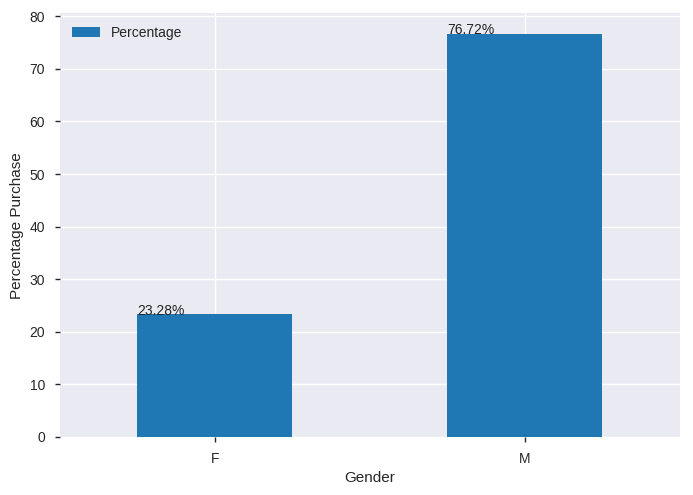

In [105]:

#def millions(x, pos):
 #   'The two args are the value and tick position'
  #  return '%1.1f%' % (x*1e-)

ax = df.plot.bar(x='Gender', y='Percentage', rot=0)
#ax.yaxis.set_major_formatter(FuncFormatter(millions)) 
ax.yaxis.set_label_text("Percentage Purchase")

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height() #height and width of the plots
    x, y = p.get_xy() 
    ax.annotate('{}{}'.format(height,'%'), (x,y + height))
  

### So from the above plot we conclude that In last month 23.28% of purchase was made by females and 76.72% of sales was made by males.But what if the region we were looking this purchasing behavior has low female population.

### As we have observed in our Univariate analysis of Gender the ratio of female to male customers is close to 1:3

### Thus for better understanding we will look at the average purchase 





In [122]:
df2 = df_train.groupby("Gender",as_index = False).agg({"User_ID" : "nunique", "Purchase" : "sum"}).rename(columns={'User_ID':'Customer_Count'})

df2["Average_Purchase"] = df2.Purchase/df2.Customer_Count

df2["Percentage_Average_Purchase"] = 100 * (df2.Average_Purchase/sum(df2.Average_Purchase)).round(4)

df2

,Gender,Customer_Count,Purchase,Average_Purchase,Percentage_Average_Purchase
0,F,1666,1186232642,712024.394958,43.49
1,M,4225,3909580100,925344.402367,56.51


#### Average purchase is calculated by Dividing Total Purchase by Customer Count

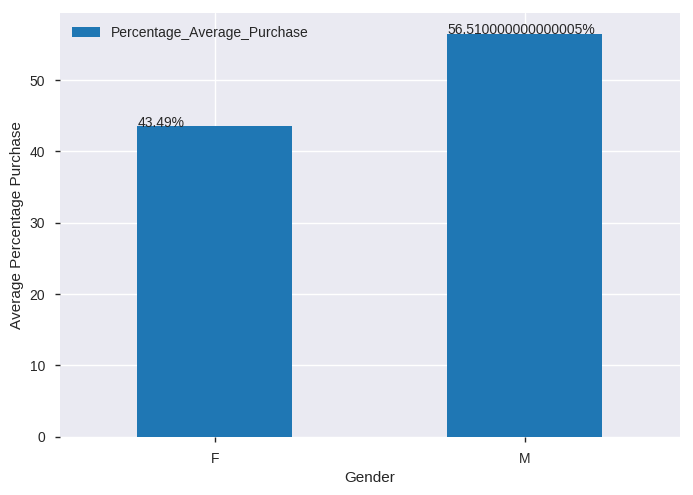

In [123]:
ax=df2.plot.bar(x= "Gender",y = "Percentage_Average_Purchase",rot = 0)

ax.yaxis.set_label_text("Average Percentage Purchase")


# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height() #height and width of the plots
    x, y = p.get_xy() 
    ax.annotate('{}{}'.format(height,'%'), (x,y + height))
  

### Now after looking at the above plot we conclude that although the female customer base of the retail company is nearly 25% but on an average 43.49% of the overall purchase in the last month was made by females only

###Observing the purchase behavior for different age groups across the two genders 